In [ ]:
  from google.colab import drive 
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
#loading libraries  with dataset 
import numpy as np 
import pandas as pd 
data_train= pd.read_excel('/content/grive/MyDrive/Data/Data_Train.xlsx')


In [ ]:
data_train.head(2) 


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
data_train.info()
#lets check for null values too 
print('**************************************************************')
data_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
**************************************************************


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
category =['Airline','Source','Destination','Total_Stops','Additional_Info']
for i in category:
  print(i,data_train[i].unique()) 
  # we found that Airline column has 12 unique values
  #Source column has 5 unique values
  #Destination column has 6 unique values 

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [ ]:
#lets now do preprocessing with feature
data_train['Date_of_Journey'] = data_train.Date_of_Journey.astype(str).str.split('/')


In [ ]:
data_train.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
data_train['date']= data_train.Date_of_Journey.str[0]
data_train['month']=data_train.Date_of_Journey.str[1]
data_train['year']=data_train.Date_of_Journey.str[2]

In [ ]:
data_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [ ]:
#now lets do it for for our route 
data_train['Total_Stops'].unique()
# from this we got to know there are max 4 stops so max stations must be 6 
data_train['Route']=data_train['Route'].str.split('→')
print("*****************")
data_train.Route



*****************


0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [ ]:
data_train['city1']=data_train['Route'].str[0]
data_train['city2']=data_train['Route'].str[1]
data_train['city3']=data_train['Route'].str[2]
data_train['city4']=data_train['Route'].str[3]
data_train['city5']=data_train['Route'].str[4]
data_train['city6']=data_train['Route'].str[5]

In [ ]:
# now lets prepare seperate colum for time and dates
data_train['Dep_Time']=data_train['Dep_Time'].astype(str).str.split(':') #has to be dropped further 
data_train['dep_time_hour']=data_train['Dep_Time'].str[0]
data_train['dep_time_min']=data_train['Dep_Time'].str[1]



In [ ]:
#now lets preprocess the arrivial time
data_train['Arrival_Time'] = data_train['Arrival_Time'].str.split(' ') # has to be dropped further 
data_train['Arrival_date'] = data_train['Arrival_Time'].str[1]

data_train['time_arrival'] = data_train['Arrival_Time'].str[0]
data_train['time_arrival'] = data_train['time_arrival'].str.split(':')
data_train['arrival_time_min'] = data_train['time_arrival'].str[1]
data_train['arrival_time_hour'] = data_train['time_arrival'].str[0]



In [ ]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,city1,city2,city3,city4,city5,city6,dep_time_hour,dep_time_min,Arrival_date,time_arrival,arrival_time_min,arrival_time_hour
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]",2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20,22,"[01, 10]",10,01
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50,NaN,"[13, 15]",15,13
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25,10,"[04, 25]",25,04
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05,NaN,"[23, 30]",30,23
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50,NaN,"[21, 35]",35,21


In [ ]:
# duration of the flight 

data_train['Duration'] = data_train['Duration'].str.split(' ') # splitting into hours and mins # need to be further dropped 
data_train['Travel_hour'] = data_train['Duration'].str[0]


data_train['Travel_hour'] = data_train['Travel_hour'].str.split('h')
data_train['Travel_hour'] = data_train['Travel_hour'].str[0]
data_train['Travel_hour'] = data_train['Travel_hour']
# now lets split in time into minutes 
data_train['Travel_min'] = data_train['Duration'].str[1]
 # now lets splitting  m and other numbers 

data_train['Travel_min'] = data_train['Travel_min'].str.split('m')
data_train['Travel_min'] = data_train['Travel_min'].str[0]




In [ ]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,city1,city2,city3,city4,city5,city6,dep_time_hour,dep_time_min,Arrival_date,time_arrival,arrival_time_min,arrival_time_hour,Travel_hour,Travel_min
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,"[BLR , DEL]","[22, 20]","[01:10, 22, Mar]","[2h, 50m]",non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN,NaN,22,20,22,"[01, 10]",10,01,2,50
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,"[CCU , IXR , BBI , BLR]","[05, 50]",[13:15],"[7h, 25m]",2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN,NaN,05,50,NaN,"[13, 15]",15,13,7,25
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,"[DEL , LKO , BOM , COK]","[09, 25]","[04:25, 10, Jun]",[19h],2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN,NaN,09,25,10,"[04, 25]",25,04,19,NaN
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,"[CCU , NAG , BLR]","[18, 05]",[23:30],"[5h, 25m]",1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN,NaN,18,05,NaN,"[23, 30]",30,23,5,25
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,"[BLR , NAG , DEL]","[16, 50]",[21:35],"[4h, 45m]",1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN,NaN,16,50,NaN,"[21, 35]",35,21,4,45


In [ ]:
# now lets do it for stop coloums 
data_train['Total_Stops'].replace('non-stop','0',inplace=True)
data_train['Total_Stops']=data_train['Total_Stops'].str.split(' ')
data_train['Total_Stops']= data_train['Total_Stops'].str[0]




In [ ]:
# now for additional info 
data_train['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data_train.Additional_Info.replace('No Info','No info',inplace= True)
data_train.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
# from above we can see that major of city 4,5,6 values are empty we will drop those features 
data_train.drop(['city4','city5','city6','Date_of_Journey','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Route','time_arrival'] , axis = 1,inplace= True)


In [ ]:
data_train.head()


,Airline,Source,Destination,Price,date,month,year,city1,city2,city3,dep_time_hour,dep_time_min,Arrival_date,arrival_time_min,arrival_time_hour,Travel_hour,Travel_min
0,IndiGo,Banglore,New Delhi,3897,24,03,2019,BLR,DEL,NaN,22,20,22,10,01,2,50
1,Air India,Kolkata,Banglore,7662,1,05,2019,CCU,IXR,BBI,05,50,NaN,15,13,7,25
2,Jet Airways,Delhi,Cochin,13882,9,06,2019,DEL,LKO,BOM,09,25,10,25,04,19,NaN
3,IndiGo,Kolkata,Banglore,6218,12,05,2019,CCU,NAG,BLR,18,05,NaN,30,23,5,25
4,IndiGo,Banglore,New Delhi,13302,01,03,2019,BLR,NAG,DEL,16,50,NaN,35,21,4,45


In [ ]:
# we got our model almost ready but we have many dimensions like with cities with many null values lets work on it 

data_train.isnull().sum()

Airline                 0
Source                  0
Destination             0
Price                   0
date                    0
month                   0
year                    0
city1                   1
city2                   1
city3                3492
dep_time_hour           0
dep_time_min            0
Arrival_date         6348
arrival_time_min        0
arrival_time_hour       0
Travel_hour             0
Travel_min           1032
dtype: int64

In [ ]:
# from missing values in city 1 
data_train[data_train['city1'].isnull()]

,Airline,Source,Destination,Price,date,month,year,city1,city2,city3,dep_time_hour,dep_time_min,Arrival_date,arrival_time_min,arrival_time_hour,Travel_hour,Travel_min
9039,Air India,Delhi,Cochin,7480,6,05,2019,NaN,NaN,NaN,09,45,07,25,09,23,40


In [ ]:
data_train[data_train['city2'].isnull()]
#k =data_train 

In [ ]:
data_train.iloc[9039]

Airline              Air India
Source                   Delhi
Destination             Cochin
Price                     7480
date                         6
month                       05
year                      2019
city1                      DEL
city2                      NaN
city3                      NaN
dep_time_hour               09
dep_time_min                45
Arrival_date                07
arrival_time_min            25
arrival_time_hour           09
Travel_hour                 23
Travel_min                  40
Name: 9039, dtype: object

In [ ]:
data_train.city1.iloc[9039] = 'DEL'
data_train.city2.iloc[9039]= 'COK'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data_train.city1.iloc[9039]
data_train.city2.iloc[9039]

'COK'

In [ ]:
data_train.iloc[9039]

Airline              Air India
Source                   Delhi
Destination             Cochin
Price                     7480
date                         6
month                       05
year                      2019
city1                      DEL
city2                      NaN
city3                      NaN
dep_time_hour               09
dep_time_min                45
Arrival_date                07
arrival_time_min            25
arrival_time_hour           09
Travel_hour                 23
Travel_min                  40
Name: 9039, dtype: object

In [ ]:
data_train.iloc[9039]

Airline              Air India
Source                   Delhi
Destination             Cochin
Price                     7480
date                         6
month                       05
year                      2019
city1                      DEL
city2                      COK
city3                      NaN
dep_time_hour               09
dep_time_min                45
Arrival_date                07
arrival_time_min            25
arrival_time_hour           09
Travel_hour                 23
Travel_min                  40
Name: 9039, dtype: object

In [ ]:
#lets do it for missing values 
data_train['city3'].fillna('None',inplace = True) # we are assiging since we have less missing values comparitively 
data_train['Arrival_date'].fillna(data_train['date'],inplace=True) # sincee  arrival and depture time cant be same 
data_train['Travel_min'].fillna(0,inplace= True)
#data_train['Total_Stops'].fillna('None',inplace= True)

In [ ]:
data_train.head()


,Airline,Source,Destination,Price,date,month,year,city1,city2,city3,dep_time_hour,dep_time_min,Arrival_date,arrival_time_min,arrival_time_hour,Travel_hour,Travel_min
0,IndiGo,Banglore,New Delhi,3897,24,03,2019,BLR,DEL,None,22,20,22,10,01,2,50
1,Air India,Kolkata,Banglore,7662,1,05,2019,CCU,IXR,BBI,05,50,1,15,13,7,25
2,Jet Airways,Delhi,Cochin,13882,9,06,2019,DEL,LKO,BOM,09,25,10,25,04,19,0
3,IndiGo,Kolkata,Banglore,6218,12,05,2019,CCU,NAG,BLR,18,05,12,30,23,5,25
4,IndiGo,Banglore,New Delhi,13302,01,03,2019,BLR,NAG,DEL,16,50,01,35,21,4,45


In [ ]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Price              10683 non-null  int64 
 4   date               10683 non-null  object
 5   month              10683 non-null  object
 6   year               10683 non-null  object
 7   city1              10683 non-null  object
 8   city2              10683 non-null  object
 9   city3              10683 non-null  object
 10  dep_time_hour      10683 non-null  object
 11  dep_time_min       10683 non-null  object
 12  Arrival_date       10683 non-null  object
 13  arrival_time_min   10683 non-null  object
 14  arrival_time_hour  10683 non-null  object
 15  Travel_hour        10683 non-null  object
 16  Travel_min         10683 non-null  objec

In [ ]:
"""data_train.drop(index=9039,inplace= True ,axis=0)
data_train[data_train['Travel_hour']=='5m'] #ValueError: invalid literal for int() with base 10: '5m' so we are editing in a precell  for the code below 
                                            #data_train['Travel_hour']=data_train.Travel_hour.astype('int64')
data_train.drop(index=6474,inplace= True,axis=0)"""

In [ ]:
# now lets change the datatype into integers 
data_train['date']=data_train.date.astype('int64')
data_train['month ']=data_train.month.astype('int64')
data_train['year']=data_train.year.astype('int64')
data_train['dep_time_hour']=data_train.dep_time_hour.astype('int64')
data_train['dep_time_min']=data_train.dep_time_min.astype('int64')
data_train['Arrival_date']=data_train.Arrival_date.astype('int64')

data_train['arrival_time_hour']=data_train.arrival_time_hour.astype('int64')
data_train['arrival_time_min']=data_train.arrival_time_min.astype('int64')
#data_train['Travel_hour']=data_train.Travel_hour.astype('int64') #invalid literal for int() with base 10: '5m' 
data_train['Travel_min']=data_train.Travel_min.astype('int64')

In [ ]:
data_train[data_train['Travel_hour']=='5m']

,Airline,Source,Destination,Price,date,month,year,city1,city2,city3,dep_time_hour,dep_time_min,Arrival_date,arrival_time_min,arrival_time_hour,Travel_hour,Travel_min,month
6474,Air India,Mumbai,Hyderabad,17327,6,03,2019,BOM,GOI,PNQ,16,50,6,55,16,5m,0,3


In [ ]:
data_train.drop(index=6474,axis=0,inplace=True) #invalid literal for int() with base 10: '5m' 

In [ ]:
data_train['Travel_hour']=data_train.Travel_hour.astype('int64')

In [ ]:
#now lets do EDA before that we make our data into categorical and numnerical
numerical =['date','month','year','dep_time_hour','dep_time_min','Arrival_date','arrival_time_min','arrival_time_hour','Travel_hour','Travel_min']
categorical=['Airline','Source','Destination','city1','city2','city3']

EDA AND plotting 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

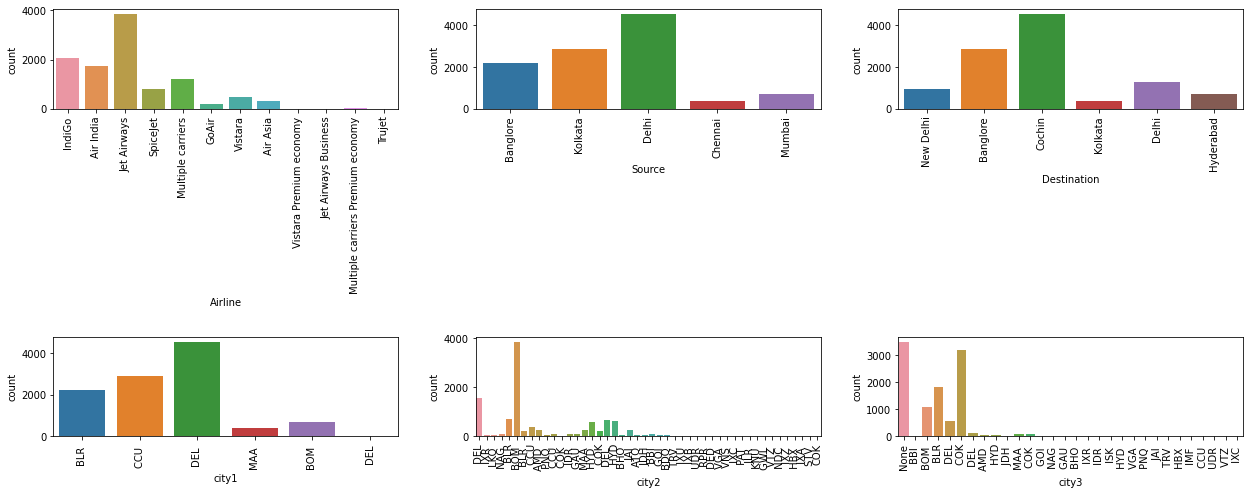

In [ ]:
# first for categorical data 
import matplotlib.pyplot as plt
import seaborn as sns 


j =1 
plt.figure(figsize=(18,25))
for i in categorical:
  plt.subplot(6,3,j)#xaxis 
  matplotlib.pyplot.xticks(rotation=90) 
  sns.countplot(data_train[i])#yaxis 
  
  plt.tight_layout(pad =3.0)
  j=j+1
plt.show()


**observation made **bold text**
1)jet airways>indigo>airinida based on the rowcount .
vistra ,trujet
2)delhi is major source for all flight take off
3) cheannai has min take off
4)cochin is where max plane arrive 
5)Kolkata has the lowest count destination
6)Most of flights take a stop in Bombay in city 2


<Figure size 1440x720 with 0 Axes>

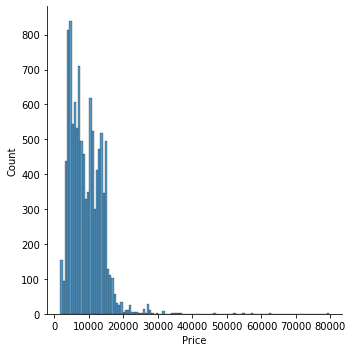

In [ ]:
# now lets check for price distribution 
plt.figure(figsize=(20,10))
sns.displot(data_train.Price)

In [ ]:
# frrom above plot minimum value looks like 1000 ad max value is around 78k or 79k approrach from graph 

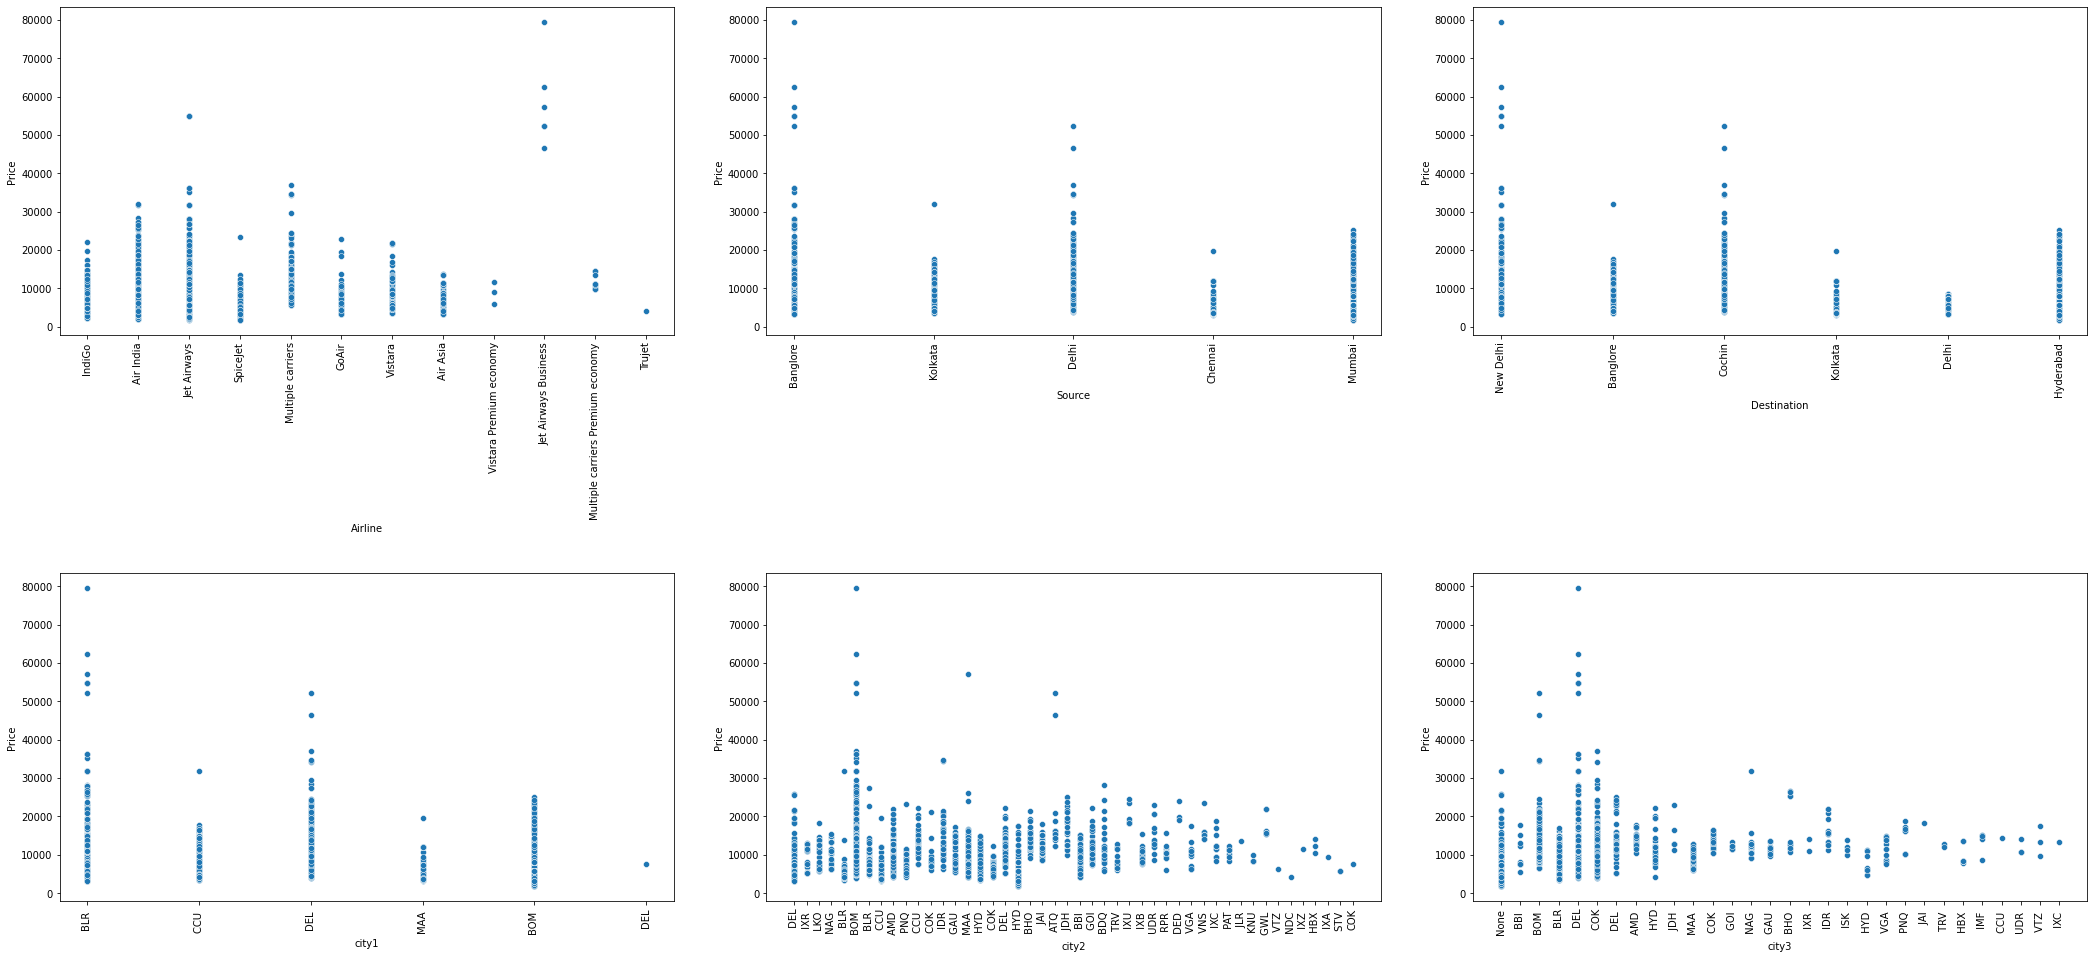

In [ ]:
#now comparing the features with prices with categorical features 
j=1 
plt.figure(figsize=(30,45))
import matplotlib

for i in categorical:
  plt.subplot(6,3,j)
  sns.scatterplot(x=data_train[i],y=data_train.Price)
  matplotlib.pyplot.xticks(rotation=90)
  plt.tight_layout(pad=4)
  j=j+1

plt.show()

In [ ]:
""" observations made are 1)Jet airways business class has the highest prices between 50k — 80k
2)high cost flights have destination as Delhi
3)lights depart from bangalore, rest of the flights have prices between 3k — 50k
4)city1 qwith banglore has highet price 
5)city2 with bombay has higehst price   """

' observations made are 1)Jet airways business class has the highest prices between 50k — 80k\n2)high cost flights have destination as Delhi\n3)lights depart from bangalore, rest of the flights have prices between 3k — 50k\n4)city1 qwith banglore has highet price \n5)city2 with bombay has higehst price   '

In [ ]:
data_train[data_train['Price']>=50000]

,Airline,Source,Destination,Price,date,month,year,city1,city2,city3,dep_time_hour,dep_time_min,Arrival_date,arrival_time_min,arrival_time_hour,Travel_hour,Travel_min,month
657,Jet Airways Business,Banglore,New Delhi,52229,1,03,2019,BLR,BOM,DEL,5,45,1,45,10,5,0,3
1478,Jet Airways,Banglore,New Delhi,54826,18,03,2019,BLR,BOM,DEL,18,40,16,45,0,6,5,3
2618,Jet Airways,Banglore,New Delhi,54826,18,03,2019,BLR,BOM,DEL,22,50,16,5,5,6,15,3
2924,Jet Airways Business,Banglore,New Delhi,79512,1,03,2019,BLR,BOM,DEL,5,45,1,25,11,5,40,3
5372,Jet Airways Business,Banglore,New Delhi,62427,1,03,2019,BLR,BOM,DEL,5,45,1,25,12,6,40,3
5439,Jet Airways,Banglore,New Delhi,54826,1,03,2019,BLR,BOM,DEL,16,55,1,0,23,6,5,3
9715,Jet Airways Business,Delhi,Cochin,52285,6,03,2019,DEL,ATQ,BOM,20,5,7,25,4,8,20,3
10364,Jet Airways Business,Banglore,New Delhi,57209,1,03,2019,BLR,MAA,DEL,9,45,1,25,14,4,40,3


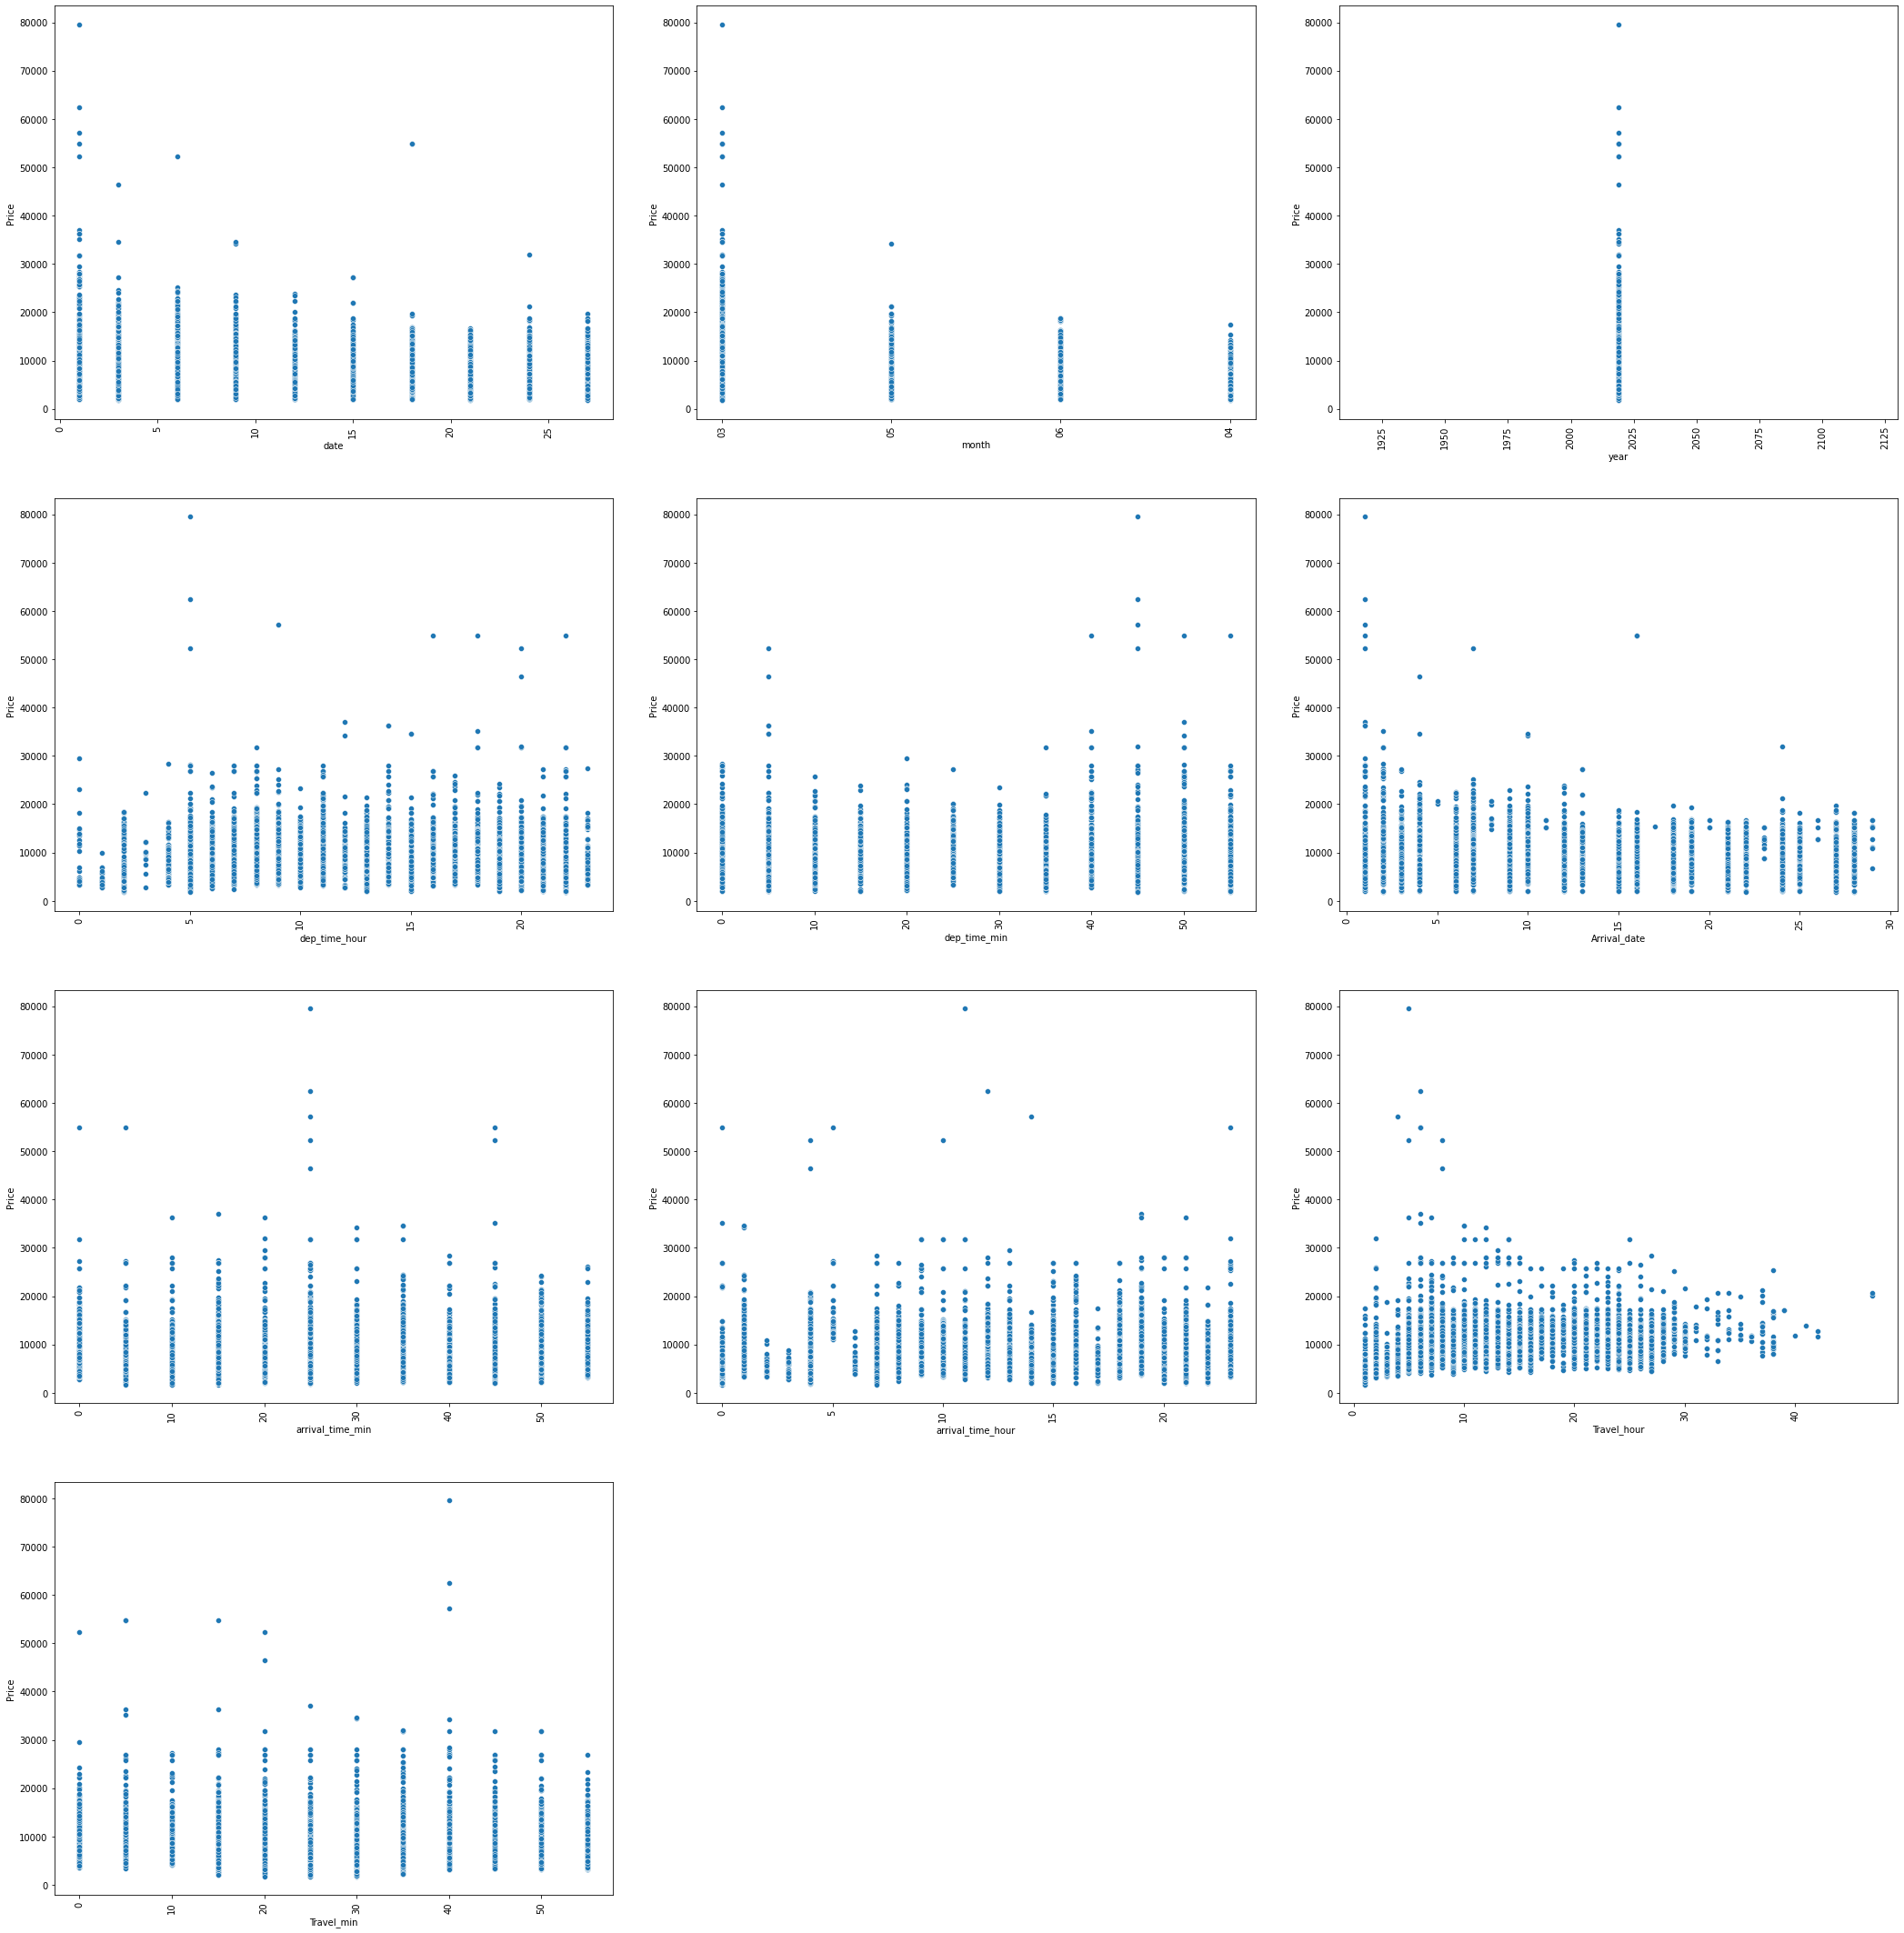

In [ ]:
#price releation wiht numerical features 
j=1 
plt.figure(figsize=(30,45))
import matplotlib

for i in numerical:
  plt.subplot(6,3,j)
  sns.scatterplot(x=data_train[i],y=data_train.Price)
  matplotlib.pyplot.xticks(rotation=90)
  plt.tight_layout(pad=4)
  j=j+1

plt.show()

In [ ]:
""" observation 
1)High price flights are during starting of month # arrivial date 
2)high prices are dring march month (3)
3)increase in travel hours, price increases,   """

In [ ]:
data_train.drop(['arrival_time_min','year','dep_time_min'],inplace= True ,axis =1)


In [ ]:
data_train

,Airline,Source,Destination,Price,date,month,city1,city2,city3,dep_time_hour,Arrival_date,arrival_time_hour,Travel_hour,Travel_min,month
0,IndiGo,Banglore,New Delhi,3897,24,03,BLR,DEL,None,22,22,1,2,50,3
1,Air India,Kolkata,Banglore,7662,1,05,CCU,IXR,BBI,5,1,13,7,25,5
2,Jet Airways,Delhi,Cochin,13882,9,06,DEL,LKO,BOM,9,10,4,19,0,6
3,IndiGo,Kolkata,Banglore,6218,12,05,CCU,NAG,BLR,18,12,23,5,25,5
4,IndiGo,Banglore,New Delhi,13302,1,03,BLR,NAG,DEL,16,1,21,4,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,9,04,CCU,BLR,None,19,9,22,2,30,4
10679,Air India,Kolkata,Banglore,4145,27,04,CCU,BLR,None,20,27,23,2,35,4
10680,Jet Airways,Banglore,Delhi,7229,27,04,BLR,DEL,None,8,27,11,3,0,4
10681,Vistara,Banglore,New Delhi,12648,1,03,BLR,DEL,None,11,1,14,2,40,3


In [ ]:
data_train.skew()

Price                1.813248
date                 0.118174
month               -0.387708
dep_time_hour        0.113224
Arrival_date         0.119667
arrival_time_hour   -0.369876
Travel_hour          0.850822
Travel_min          -0.091004
month               -0.387708
dtype: float64

In [ ]:
data_train['Travel_hour']= np.log(data_train.Travel_hour)

In [ ]:
data_train['Travel_hour'].skew()

-0.26612233332369917

observations made 

jetairways businees class is with highest prces 
flights going to delhi have more costs 
flights depeturing from banglore is having more cost 


In [ ]:
#now lets encode the categorical data and built our model 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in data_train.columns:
  if data_train[i].dtypes == 'object':
    print(i)
    data_train[i] = le.fit_transform(data_train[i])

Airline
Source
Destination
month
city1
city2
city3


In [ ]:
data_train

,Airline,Source,Destination,Price,date,month,city1,city2,city3,dep_time_hour,Arrival_date,arrival_time_hour,Travel_hour,Travel_min,month
0,3,0,5,3897,24,0,0,13,29,22,22,1,0.693147,50,3
1,1,3,0,7662,1,2,2,25,1,5,1,13,1.945910,25,5
2,4,2,1,13882,9,3,4,32,4,9,10,4,2.944439,0,6
3,3,3,0,6218,12,2,2,34,3,18,12,23,1.609438,25,5
4,3,0,5,13302,1,0,0,34,8,16,1,21,1.386294,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4107,9,1,2,5,29,19,9,22,0.693147,30,4
10679,1,3,0,4145,27,1,2,5,29,20,27,23,0.693147,35,4
10680,4,0,2,7229,27,1,0,13,29,8,27,11,1.098612,0,4
10681,10,0,5,12648,1,0,0,13,29,11,1,14,0.693147,40,3


In [ ]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_x = data_train.drop('Price',axis=1)
y = data_train.Price

In [ ]:
k = sc.fit_transform(data_x)
x = pd.DataFrame(k,columns=data_x.columns)

In [ ]:
x


,Airline,Source,Destination,date,month,city1,city2,city3,dep_time_hour,Arrival_date,arrival_time_hour,Travel_hour,Travel_min,month
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,-1.515607,0.137204,1.395015,1.654268,0.955750,-1.800319,-1.183304,1.278932,-1.467707
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,-0.293280,1.634890,-1.082280,-1.303000,-1.524648,-0.050813,0.052178,-0.196525,0.250153
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.929046,2.508541,-0.816856,-0.607172,-0.461621,-1.362943,1.036933,-1.671983,1.109082
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,-0.293280,2.758155,-0.905330,0.958440,-0.225392,1.407109,-0.279653,-0.196525,0.250153
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,-1.515607,2.758155,-0.462956,0.610527,-1.524648,1.115525,-0.499718,0.983841,-1.467707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,-0.531796,-0.608777,-0.293280,-0.861254,1.395015,1.132397,-0.579735,1.261317,-1.183304,0.098566,-0.608777
10678,-1.261152,0.890299,-0.973732,1.591104,-0.608777,-0.293280,-0.861254,1.395015,1.306354,1.546321,1.407109,-1.183304,0.393658,-0.608777
10679,0.014369,-1.658435,0.382472,1.591104,-0.608777,-1.515607,0.137204,1.395015,-0.781129,1.546321,-0.342397,-0.783432,-1.671983,-0.608777
10680,2.565411,-1.658435,2.416778,-1.475307,-1.467707,-1.515607,0.137204,1.395015,-0.259258,-1.524648,0.094979,-1.183304,0.688749,-1.467707


In [ ]:
""" now lets do our regression problem here """

' now lets do our regression problem here '

model building and fitting 


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
svr= SVR()
lr = LinearRegression()
knn = KNeighborsRegressor()
dt=DecisionTreeRegressor()

In [ ]:
# data splitting 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
for i in [svr, lr ,knn, dt]:
  i.fit(x_train, y_train)
  pred = i.predict(x_test)
  testscore = r2_score(y_test,pred)
  trainscore= r2_score(y_train,i.predict(x_train))
  if abs(trainscore - testscore) <= 0.1:
    print(i)
    print('mean absolute error',mean_absolute_error(y_test,pred))
    print('mean squre error',mean_squared_error(y_test,pred))
    print('r 2 score',r2_score(y_test,pred))
    print('r2 for train error',r2_score(y_train,i.predict(x_train)))
    print('r2 for train data',r2_score(y_train,i.predict(x_train)))
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
mean absolute error 3410.1011044513043
mean squre error 19391109.577016413
r 2 score 0.04208179668582834
r2 for train error 0.03600756245137926
r2 for train data 0.03600756245137926
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
mean absolute error 2347.307667489545
mean squre error 10364425.958090244
r 2 score 0.4879987525868972
r2 for train error 0.45641487540484915
r2 for train data 0.45641487540484915
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
mean absolute error 1587.8627145085804
mean squre error 5873125.317366616
r 2 score 0.7098683997681563
r2 for tra

In [ ]:
# observation here are for KNN we got r 2 score of 70.8% out of all models 

In [ ]:
# lets check random forest in sperate for it 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
testscore = r2_score(y_test,pred)
trainscore= r2_score(y_train,rf.predict(x_train))
if abs(trainscore - testscore) <= 0.2: # when we used above 0.1 the conditon was false to avoid it we have update it to 0.2 
  print('mean absolute error',mean_absolute_error(y_test,pred))
  print('mean squre error',mean_squared_error(y_test,pred))
  print('r 2 score',r2_score(y_test,pred))
  print('r2 for train error',r2_score(y_train,rf.predict(x_train)))
  print('r2 for train data',r2_score(y_train,rf.predict(x_train)))


mean absolute error 1152.0905720014948
mean squre error 3836603.503935214
r 2 score 0.8104723032623928
r2 for train error 0.9556942692786649
r2 for train data 0.9556942692786649


In [ ]:

# cross validation from sklearn.model_selection import cross_val_score
for i in range(2,9):
  cv = cross_val_score(rf,x,y,cv=i)
  print(rf,cv.mean())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 0.7908600820355147
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_

In [ ]:
#from above we can see the random forest provdies cross validation score of 80.54% 
# we will do hyperparameter tunning 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10,20,30,40,50],'max_depth':[1,2,3,None],'max_samples':[20,50,150,250,500]}
gscv = GridSearchCV(rf,param_grid,cv=3)


In [ ]:
# fitting the model 
model = gscv.fit(x_train,y_train)

In [ ]:
model.best_params_

{'max_depth': None, 'max_samples': 500, 'n_estimators': 30}

In [ ]:
rf = RandomForestRegressor(n_estimators=30,max_samples=1000,max_depth=None)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
testscore = r2_score(y_test,pred)
trainscore= r2_score(y_train,rf.predict(x_train))
if abs(trainscore - testscore) <= 0.2: # when we used above 0.1 the conditon was false to avoid it we have update it to 0.2 
  print('mean absolute error',mean_absolute_error(y_test,pred))
  print('mean squre error',mean_squared_error(y_test,pred))
  print('r 2 score',r2_score(y_test,pred))
  print('r2 for train error',r2_score(y_train,rf.predict(x_train)))
  print('r2 for train data',r2_score(y_train,rf.predict(x_train)))



mean absolute error 1372.2626070376148
mean squre error 4309792.982699081
r 2 score 0.78709680669659
r2 for train error 0.8131643941199513
r2 for train data 0.8131643941199513


In [ ]:
# so our model is giving us 78.7% r2 score 
modelfinal = RandomForestRegressor(n_estimators=30,max_samples=1000,max_depth=None)